In [1]:
import cv2
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Black_circle.jpg/240px-Black_circle.jpg"
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)


In [3]:
sobel_x_kernel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_y_kernel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

b, g, r = cv2.split(img)


sobel_x_r = cv2.filter2D(r, cv2.CV_64F, sobel_x_kernel)
sobel_y_r = cv2.filter2D(r, cv2.CV_64F, sobel_y_kernel)

sobel_x_g = cv2.filter2D(g, cv2.CV_64F, sobel_x_kernel)
sobel_y_g = cv2.filter2D(g, cv2.CV_64F, sobel_y_kernel)

sobel_x_b = cv2.filter2D(b, cv2.CV_64F, sobel_x_kernel)
sobel_y_b = cv2.filter2D(b, cv2.CV_64F, sobel_y_kernel)



In [4]:
def apply_convolution(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def edge_detection(image):
    laplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    edge_laplace = apply_convolution(image, laplace)

    return edge_laplace

edge_laplace = edge_detection(img)


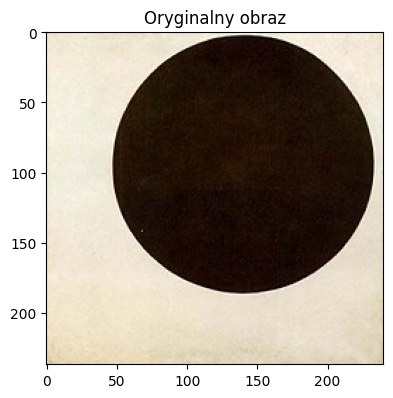

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Oryginalny obraz')
plt.show()

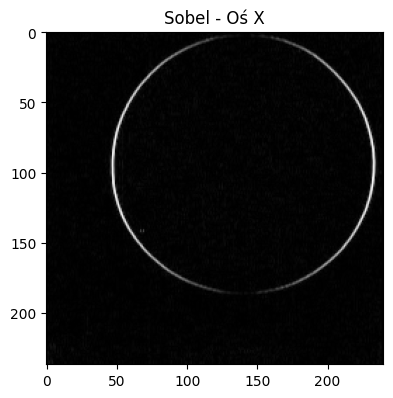

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 2)
plt.imshow(np.abs(sobel_x_r), cmap='gray')
plt.title('Sobel - Oś X')
plt.show()

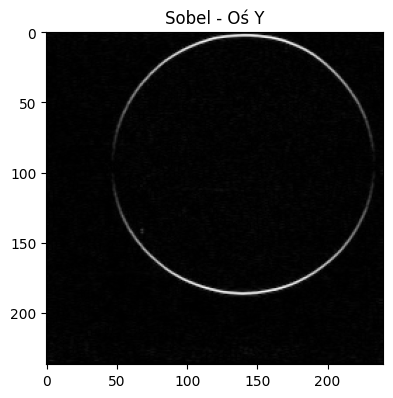

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 3)
plt.imshow(np.abs(sobel_y_r), cmap='gray')
plt.title('Sobel - Oś Y')
plt.show()

Text(0.5, 1.0, 'Laplace Edge Detection')

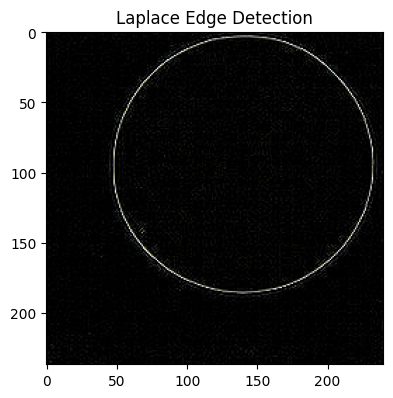

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 4)
plt.imshow(edge_laplace[:, :, ::-1])
plt.title('Laplace Edge Detection')